# Mushroom Classification

Mushrooms have become important again. Many people eat and hunt them in the wild. These project serves to produce a model that would help mushroom enthusiasts to classify a given mushroom species as edible or poisonous.

<img src="image/mushrooms_pix.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb

import pickle

%matplotlib inline

## Import the data

In [2]:
mushrooms_df = pd.read_csv('data/mushrooms.csv')
mushrooms_df.shape

(8124, 23)

we see that there are 8124 samples and 22 features with one target variable, class.

In [3]:
# a look at the first five rows
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


as it stands, we need to do a lot of mapping to make the letters understandable. The code for the letters in the values are in the Kaggle competition description. 

In [4]:
# transposing the dataframe so all the columns will be clearly shown
mushrooms_df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


The class column is our target. We need to make it that edible species are 1 and poisonous species are 0

In [5]:
class_map = {'e': 1, 'p': 0}
mushrooms_df['class'] = mushrooms_df['class'].map(class_map)

In [6]:
# cap-shape feature mapping
capshape_map = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k':'knobbed', 's':'sunken'}
mushrooms_df['cap-shape']= mushrooms_df['cap-shape'].map(capshape_map) 

In [7]:
# cap-surface feature mapping
capsurface_map = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
mushrooms_df['cap-surface'] = mushrooms_df['cap-surface'].map(capsurface_map)

In [8]:
# cap-color feature mapping
capcolor_map = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 
    'g':'gray', 'r': 'green', 'p':'pink','u':'purple', 'e':'red', 'w':'white','y':'yellow'}
mushrooms_df['cap-color'] = mushrooms_df['cap-color'].map(capcolor_map)    

In [9]:
# bruises feature mapping
bruises_map = {'t': 'bruises', 'f': 'no'}
mushrooms_df.bruises = mushrooms_df.bruises.map(bruises_map)

In [10]:
# odor feature map
odor_map = {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 
    'm':'musty', 'n':'none', 'p':'pungent', 's':'spicy'}
mushrooms_df.odor = mushrooms_df.odor.map(odor_map)    

In [11]:
# gill-attachment feature mapping
gillattachment_map = {'a':'attached', 'd':'descending', 'f':'free', 'n':'notched'}
mushrooms_df['gill-attachment'] = mushrooms_df['gill-attachment'].map(gillattachment_map)

In [12]:
# gill-spacing feature mapping
gillspacing_map = {'c':'close', 'w':'crowded', 'd':'distant'}
mushrooms_df['gill-spacing'] = mushrooms_df['gill-spacing'].map(gillspacing_map)

In [13]:
# gill-size feature mapping
gillsize_map = {'b':'broad', 'n':'narrow'}
mushrooms_df['gill-size'] = mushrooms_df['gill-size'].map(gillsize_map)

In [14]:
# gill-color feature mapping
gillcolor_map = {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray', 
    'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 
    'y':'yellow'}
mushrooms_df['gill-color'] = mushrooms_df['gill-color'].map(gillcolor_map)

In [15]:
# stalk-shape feature mapping
stalkshape_map = {'e':'enlarging', 't':'tapering'}
mushrooms_df['stalk-shape'] = mushrooms_df['stalk-shape'].map(stalkshape_map)

In [16]:
# stalk-root feature mapping
stalkroot_map = {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 
    'z':'rhizomorphs', 'r':'rooted', '?':'missing'}
mushrooms_df['stalk-root'] = mushrooms_df['stalk-root'].map(stalkroot_map)    

In [17]:
# stalk-surface-above-ring feature mapping
stalksurfaceabovering_map = {'f':'fibrous', 'y': 'scaly', 'k':'silky', 's':'smooth'}
mushrooms_df['stalk-surface-above-ring'] = mushrooms_df['stalk-surface-above-ring'].map(stalksurfaceabovering_map)

In [18]:
# stalk-surface-below-ring feature mapping
stalksurfacebelowring_map = {'f':'fibrous', 'y': 'scaly', 'k': 'silky', 's':'smooth'}
mushrooms_df['stalk-surface-below-ring'] = mushrooms_df['stalk-surface-below-ring'].map(stalksurfacebelowring_map)


In [19]:
# stalk-color-above-ring feature mapping
stalkcolorabovering_map = {'n':'brown', 'b': 'buff', 'c': 'cinnamon', 'g':'gray', 
    'o':'orange', 'p':'pink', 'e': 'red', 'w':'white', 'y':'yellow'}
mushrooms_df['stalk-color-above-ring'] = mushrooms_df['stalk-color-above-ring'].map(stalkcolorabovering_map)    

In [20]:
# stalk-color-below-ring feature mapping
stalkcolorbelowring_map = {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 
    'o':'orange', 'p':'pink', 'e':'red', 'w': 'white', 'y':'yellow'}
mushrooms_df['stalk-color-below-ring'] = mushrooms_df['stalk-color-below-ring'].map(stalkcolorbelowring_map)    

In [21]:
# veil-type feature mapping
veiltype_map = {'p':'partial', 'u':'universal'}
mushrooms_df['veil-type'] = mushrooms_df['veil-type'].map(veiltype_map)

In [22]:
# veil-color feature mapping
veilcolor_map = {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'}
mushrooms_df['veil-color'] = mushrooms_df['veil-color'].map(veilcolor_map)

In [23]:
# ring-number feature mapping
ringnumber_map = {'n':'none', 'o':'one', 't':'two'}
mushrooms_df['ring-number'] = mushrooms_df['ring-number'].map(ringnumber_map)

In [24]:
# ring-type feature mapping
ringtype_map = {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large',
    'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'}
mushrooms_df['ring-type'] = mushrooms_df['ring-type'].map(ringtype_map)    

In [25]:
# spore-print-color feature mapping
sporeprintcolor_map = {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate',
    'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'}
mushrooms_df['spore-print-color'] = mushrooms_df['spore-print-color'].map(sporeprintcolor_map)

In [26]:
# population feature mapping
population_map = {'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 
    'v':'several', 'y':'solitary'}
mushrooms_df.population = mushrooms_df.population.map(population_map)

In [27]:
# habitat feature mapping
habitat_map = {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 
    'w':'waste', 'd':'woods'}
mushrooms_df.habitat = mushrooms_df.habitat.map(habitat_map)    

In [28]:
# taking a look at what we just did again
mushrooms_df.head().T


,0,1,2,3,4
class,0,1,1,0,1
cap-shape,convex,convex,bell,convex,convex
cap-surface,smooth,smooth,smooth,scaly,smooth
cap-color,brown,yellow,white,white,gray
bruises,bruises,bruises,bruises,bruises,no
odor,pungent,almond,anise,pungent,none
gill-attachment,free,free,free,free,free
gill-spacing,close,close,close,close,crowded
gill-size,narrow,broad,broad,narrow,broad
gill-color,black,black,brown,brown,black


## Exploretory data analysis, EDA

First, the test set has to be separated from the data set

In [29]:
full_train_df, test_df = train_test_split(mushrooms_df, test_size=0.2, random_state=1)

In [30]:
full_train_df['class'].value_counts()

1    3388
0    3111
Name: class, dtype: int64

From the result above, the classes are balanced. We have 3350 edible classes and 3149 poisonous classes. 

In [31]:
full_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 1610 to 5157
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6499 non-null   int64 
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object
 14  stalk-color-above-rin

We can see that all the predictors are categorical variables. Also, there are no null values in the train data set. 

In [32]:
test_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are also no null values in the test data set. 

Let's examine the charts for select features. Features to use for the charts were based on the web article in the references on how to select posionous mushrooms. In our bid to choose edible mushrooms, we need to filter for the poisonous ones. 

### Gill color

<BarContainer object of 12 artists>

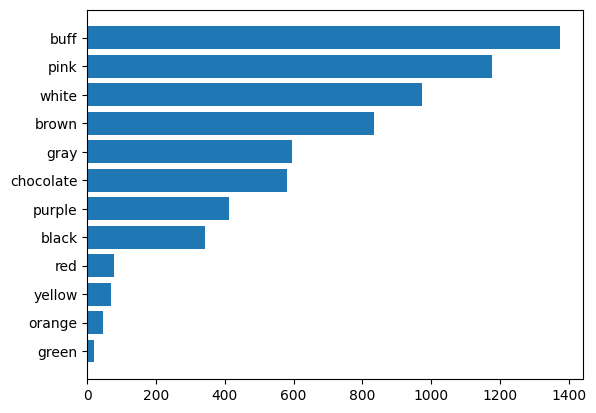

In [33]:
# examining the distribution of the gill color

# get the frequency table of the gill color feature
gillcolor = full_train_df['gill-color'].value_counts()
# separate the y axis and the x axis
gillcolor_index = list(gillcolor.index) 
gillcolor_values = list(gillcolor.values)
# reverse the list for both axis so that the topmost will appear first
gillcolor_index.reverse()
gillcolor_values.reverse()
plt.barh(gillcolor_index, gillcolor_values)


Most of the gill colors are buff, pink and white. The spores of a mushroom determine its color. Generally, buff colored gills signify a likely poisonous mushroom. When young the gills are white. So that means in our data set, we have a lot of young mushrooms. Young mushrooms are good when eaten raw but avoid mushrooms with white spores or gills. 

### Cap shape

<BarContainer object of 6 artists>

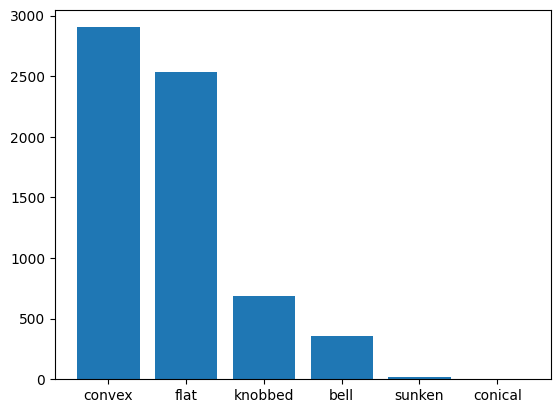

In [34]:
# Examining cap shape distribution

# creating the frequency table
capshape = full_train_df['cap-shape'].value_counts()
# separating the x and y axis for the chart
capshape_index = list(capshape.index)
capshape_values = list(capshape.values)
plt.bar(capshape_index, capshape_values)

We see that the convesx and flat cap shape mushrooms are more in number in the data set. Most young mushrooms have a convex cap shape. Most flat capped mushrooms are ideal for eating. Best eaten cooked. The sunken and conical capped mushrooms are few. 

### Ring number

<BarContainer object of 3 artists>

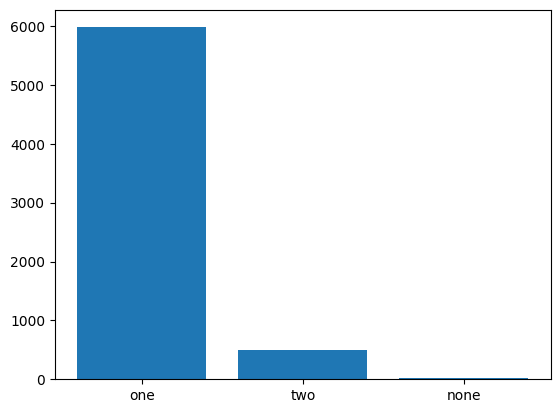

In [35]:
# ring number distribution

# getting the frequency table
ringnumber = full_train_df['ring-number'].value_counts()
# x and y axis point
ringnumber_index = list(ringnumber.index)
ringnumber_values = list(ringnumber.values)
plt.bar(ringnumber_index, ringnumber_values)

There are about 6000 mushrooms with one ring and less than 500 mushrooms with 2 rings. There are less than 10 mushrooms without any ring. Mushrooms in the same genera can have different rings. A ring is a collar-like structure that covers the gills when it is young. 

### Spore print color

<BarContainer object of 9 artists>

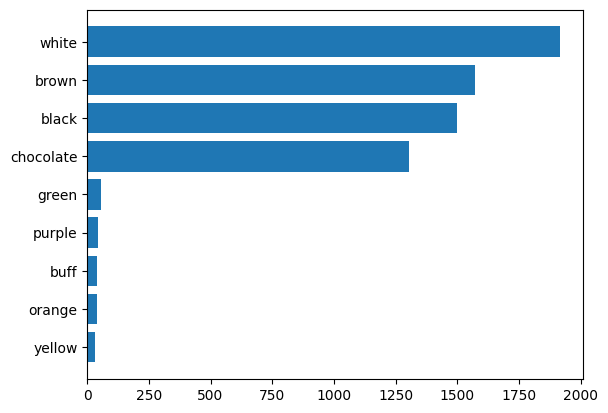

In [36]:
# color of the spore prints distribution

# frequency table
sporeprintcolor = full_train_df['spore-print-color'].value_counts()
# x and y axis
sporeprintcolor_index = list(sporeprintcolor.index)
sporeprintcolor_values = list(sporeprintcolor.values)
# making the chart sorted by descending order
sporeprintcolor_index.reverse()
sporeprintcolor_values.reverse()
plt.barh(sporeprintcolor_index, sporeprintcolor_values)

We have a good mix of young and mature mushrooms in the data set. White spore prints means the mushroom is young, while darker prints like brown and black means it is mature. There three colors make up more than 80% of the dataset. 

### Stalk root

<BarContainer object of 5 artists>

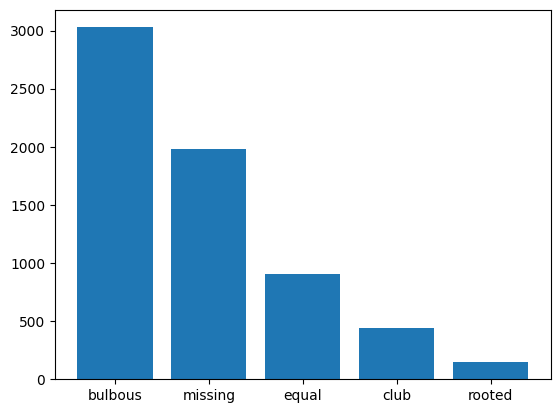

In [37]:
# stalk root distribution

# frequency distribution for the stalk root
stalkroot = full_train_df['stalk-root'].value_counts()
# x and y axis
stalkroot_index = list(stalkroot.index)
stalkroot_values = list(stalkroot.values)
plt.bar(stalkroot_index, stalkroot_values)

Most mushrooms have a bulbous stalk root. Although not all mushrooms with bulbous stalk root are dangerous, to be on the safe side, one should avoid them. The next are mushrooms without stalk roots. Mushrooms with rooted stalk roots are fewer than all other categories. 

Now let's do feature selection to filter out the predictors that have little or not relationship to the target, the class variable. We will be using mutual information score since all our predictors are categorical variables. 

## Feature selection

Mutual information score will be used for feature selection. 

A mutual information score measures the amount of information one can obtain from one random variable given another. Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent.

MI scores are usually used for categorical variables. 

Before doing the feature selection, we need to separate the full train data into train data and validation data so as to prevent data leakage when doing validation in model building. 

In [38]:
# separate the full train data set so that we have 60% train, 20% validation, and 20% test
# we have previouusly separated the test data set
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=1)

In [39]:
# separating the targets from the variables, train dataframe
y_train = train_df['class']
train_df = train_df.drop("class", axis=1)

In [40]:
# separating the targets from the predictors, validation dataframe
y_val = val_df['class']
val_df = val_df.drop("class", axis=1)

# separation, test dataframe
y_test = test_df['class']
test_df = test_df.drop("class", axis=1)

In [41]:
# calculate the mutual information score on the train data frame
def score(series):
    return mutual_info_score(series, y_train)

In [42]:
mi = train_df.apply(score)
mi.sort_values(ascending=False)

odor                       0.63
spore-print-color          0.34
gill-color                 0.30
ring-type                  0.23
stalk-surface-above-ring   0.20
stalk-surface-below-ring   0.19
stalk-color-above-ring     0.17
stalk-color-below-ring     0.17
gill-size                  0.15
bruises                    0.14
population                 0.13
habitat                    0.11
stalk-root                 0.09
gill-spacing               0.07
cap-shape                  0.03
ring-number                0.03
cap-color                  0.03
cap-surface                0.02
veil-color                 0.02
gill-attachment            0.01
stalk-shape                0.00
veil-type                  0.00
dtype: float64

We want the filter the columns based on those with high MI scores. Let the threshold be 0.06. 

In [43]:
# iterating through the mi score to filter the predictors
# store the indexes in a list
keep_cols = []
for index, value in mi.items():
    if value > 0.06:
        keep_cols.append(index)

In [44]:
# now we filter the dataframes based on the columns to use
train_df = train_df[keep_cols]
val_df = val_df[keep_cols]
test_df = test_df[keep_cols]

We have ultimately selected 14 columns from the initial 23 that will be used in model building and prediction. 

In [45]:
f'The number of columns in the train data frame is {train_df.shape[1]}.'

'The number of columns in the train data frame is 14.'

# Feature Engineering

For the feature engineering, I will only use one-hot encoding to transform all the categorical features to numerical features. I was initially doubtful about using OHE due to the fear of using a sparse dataset, but experts online assured me that with the number of features I have, the sparsity is insignificant. 

So now going for OHE. We'll use DictVectorizer for this because it is convenient. 

In [46]:
# dictvectorizer object
dv = DictVectorizer(sparse=False)

# train data frame OHE
train_dict = train_df.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

# val data frame for OHE
val_dict = val_df.to_dict(orient="records")
X_val = dv.transform(val_dict)

# test datafra,e for OHE
test_dict = test_df.to_dict(orient="records")
X_test = dv.transform(test_dict)


## Model Building

I will first use a python library called lazypredict to find out what models give the best results on the dataset. After that, I will compare lazypredict's best model with XGBoost and choose which model to tune. 

In [47]:
# instantiating the lazy classifier object 
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)
models

100%|██████████| 29/29 [00:34<00:00,  1.21s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.93
BaggingClassifier,1.00,1.00,1.00,1.00,0.21
XGBClassifier,1.00,1.00,1.00,1.00,5.63
SVC,1.00,1.00,1.00,1.00,1.44
SGDClassifier,1.00,1.00,1.00,1.00,0.15
RidgeClassifierCV,1.00,1.00,1.00,1.00,1.16
RidgeClassifier,1.00,1.00,1.00,1.00,0.22
RandomForestClassifier,1.00,1.00,1.00,1.00,1.01
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,2.56


Lazypredict is telling us that the boosting models give the best score or even a perfect score for the data set. So, we'll now retrain on the xgboost library to see it clearly. 

In [48]:
# instantiate the model and fit the data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
# make predictions on the validatioin data set
predicted_y = model.predict(X_val)

I will use the F1 score to assess the prediction. The F1 score gives better evaluation than just using accuracy. 

In [50]:
# check the classification report for f1 score
print(metrics.classification_report(y_val, predicted_y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



As lazypredict suggest, the XGBClassifier gave good scores for the validation. Let's visualize the results to see them. 

In [51]:
scores_df = pd.DataFrame({"ground-truth": y_val, "prediction": predicted_y})
scores_df

,ground-truth,prediction
5274,0,0
213,1,1
7560,1,1
7981,0,0
5616,0,0
...,...,...
2568,1,1
7405,1,1
6227,0,0
583,1,1


The next step is to combine the train and validation data frames to get a harmonious overall dataframe. 

In [52]:
# get the target class 
y_train_full = full_train_df['class']

In [53]:
# keep only the relevant columns
full_train_df = full_train_df[keep_cols]
full_train_df.shape[1]

14

In [54]:
# we now do one hot encoding
dv_final = DictVectorizer(sparse=False)

# train data frame OHE
train_dict_full = full_train_df.to_dict(orient="records")
X_train_full = dv_final.fit_transform(train_dict_full)

# test datafra,e for OHE
test_dict = test_df.to_dict(orient="records")
X_test_full = dv_final.transform(test_dict)


In [55]:
# instantiating the model and fitting it
model_final = xgb.XGBClassifier()
model_final.fit(X_train_full, y_train_full)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
# let's predict on the final test and evaluate it using classification report
prediction_full = model_final.predict(X_test_full)

In [57]:
# check the classification report for f1 score
print(metrics.classification_report(y_test, prediction_full))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       820

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



After exhaustive analysis and consultation with experts on why the model is giving a perfect report, I can say that this is a good model for predicting the type of mushroom species, whether poisonous or edible. 

It's now time to save the model

In [58]:

# The model and encoder is saved as a binary file using pickle
# with open('model.bin', 'wb') as f_out:
#    pickle.dump((dv_final, model_final), f_out)
# f_out.close() 

## References

1. How to identify poisonous mushrooms. https://www.wikihow.com/Identify-Poisonous-Mushrooms

2. Information gain and mutual information for machine learning: https://machinelearningmastery.com/information-gain-and-mutual-information/